In [62]:
!jupyter notebook --version

6.0.3


In [40]:
import pandas as pd
import numpy as np
import cufflinks as cf
from plotly.offline import plot, iplot
cf.go_offline()

# Analise exploratoria de dados

In [41]:
data = "D:/Projetos_Data_Science/Projeto_Olist/data/olist_orders_dataset.csv"
df_orders = pd.read_csv(data, sep=",")

In [3]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [5]:
df_orders.shape

(99441, 8)

In [42]:
df_orders["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [7]:
df_orders["order_status"].value_counts().iplot(kind = 'bar')

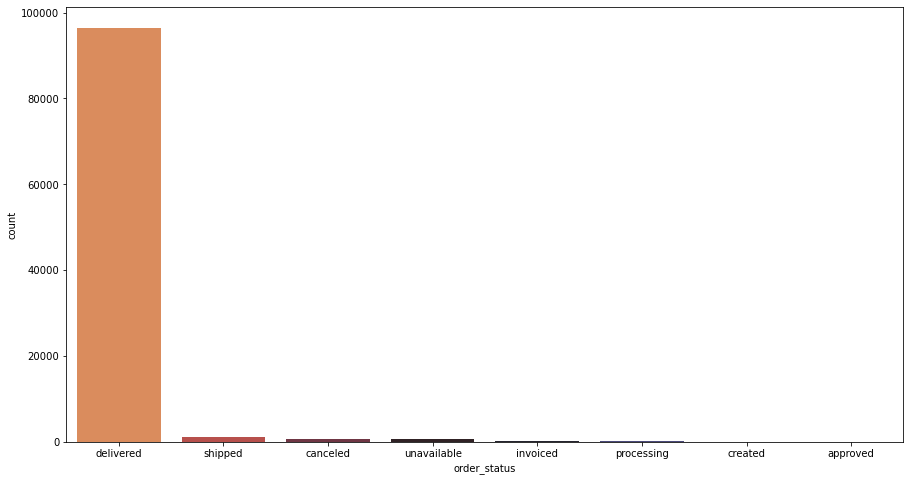

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.countplot(x ='order_status', data=df_orders, 
              order=df_orders['order_status'].value_counts().sort_values(ascending = False).index, 
              palette='icefire_r')

In [8]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
df_orders[df_orders['order_delivered_customer_date'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


### Identificando pedidos entregues sem data de entrega

In [10]:
# Criando um novo dataframe para identificar se existe algum pedido entregue sem data de entrega (erro sistemico?)
df_null = df_orders[df_orders['order_delivered_customer_date'].isnull()]

In [11]:
df_null.order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

### Neste caso identificamos 8 pedidos dos quais foram entregues e não possuimos a data de entrega. A empresa deve investigar se foi falha sistemica ou algum erro operacional

In [12]:
# Iremos demonstrar quais linhas são estes 8 pedidos
df_null.loc[df_null["order_status"]=='delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


### Criando um novo DF eliminando colunas da qual possuem todos os dados nulos

In [13]:
df_orders_new = df_orders.dropna(how='all', axis=1).copy()

In [14]:
df_orders_new.shape

(99441, 8)

Como não existiu alteração no números de colunas, irei continuar usando o DF anterior (df_orders)

## Trabalhando com as datas

Verificar o tipo de dados das series com datas

In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Transformando o tipo de algumas colunas

In [16]:
df_orders.order_status = df_orders['order_status'].astype("category")
df_orders.order_purchase_timestamp = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders.order_approved_at = pd.to_datetime(df_orders['order_approved_at'])
df_orders.order_delivered_customer_date = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders.order_estimated_delivery_date = pd.to_datetime(df_orders['order_estimated_delivery_date'])

In [17]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [18]:
# Criando 3 novas colunas e alterando o formato
df_orders['data_entrega']=pd.to_datetime(df_orders['order_delivered_customer_date'],
                                            format='%Y-%m-%d').dt.date
df_orders['data_estimada']=pd.to_datetime(df_orders['order_estimated_delivery_date'], 
                                           format='%Y-%m-%d').dt.date

In [19]:
df_orders['mes_compra'] = df_orders['order_purchase_timestamp'].dt.to_period('M').astype(str)

In [20]:
df_orders['dif_dias']= df_orders['data_entrega']-df_orders['data_estimada']

In [21]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,data_entrega,data_estimada,mes_compra,dif_dias
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-10,2017-10-18,2017-10,-8 days
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08-07,2018-08-13,2018-07,-6 days
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-17,2018-09-04,2018-08,-18 days
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12-02,2017-12-15,2017-11,-13 days
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-16,2018-02-26,2018-02,-10 days


### Quais meses houveram mais vendas?

In [22]:
vendas_mes = df_orders.groupby(by='mes_compra').order_id.count()

In [23]:
vendas_mes_max = vendas_mes.values.max()

In [24]:
vendas_mes_max

7544

In [25]:
cores = []
for x,y in zip(vendas_mes.values, vendas_mes.index):
    if x == vendas_mes_max:
        mes_maximo_de_vendas = y
        cores.append('blue')
    else:
        cores.append('lightgray')

In [26]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Bar(x=vendas_mes.index,
               y=vendas_mes.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                 'width': 2}
                        },
               opacity= 0.7
              )
       ]

# Criando Layout
configuracoes_layout = go.Layout(title='Qtdade de vendas no Periodo',
                                 yaxis={'title':'Qtdade de Vendas'},
                                 xaxis={'title': 'Periodo'},
                                 # texto na barra de destaque
                                 annotations = [{'text':'Mês destaque de vendas',
                                                'x':mes_maximo_de_vendas,
                                                'y':vendas_mes_max}
                                               ]
                                                                                              
                                )

# Objeto figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig, filename='Mes destaque de vendas')

## Realizar Merge entre as bases de dados

In [27]:
data = "D:/Projetos_Data_Science/Projeto_Olist/data/olist_order_items_dataset.csv"
ordem_itens = pd.read_csv(data, sep=",")

In [28]:
df_total_ordem = pd.merge(df_orders,ordem_itens)

In [29]:
data = "D:/Projetos_Data_Science/Projeto_Olist/data/olist_products_dataset.csv"
produtos = pd.read_csv(data, sep=",")

In [30]:
df_ordem_produto = pd.merge(df_total_ordem, produtos, on = 'product_id' )

In [31]:
df_ordem_produto.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'data_entrega', 'data_estimada', 'mes_compra', 'dif_dias',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [32]:
df_ordem_produto['prod_id_red'] = df_ordem_produto['product_id'].str[-5:]

In [33]:
df_ordem_produto.dtypes

order_id                                  object
customer_id                               object
order_status                            category
order_purchase_timestamp          datetime64[ns]
order_approved_at                 datetime64[ns]
order_delivered_carrier_date              object
order_delivered_customer_date     datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
data_entrega                              object
data_estimada                             object
mes_compra                                object
dif_dias                         timedelta64[ns]
order_item_id                              int64
product_id                                object
seller_id                                 object
shipping_limit_date                       object
price                                    float64
freight_value                            float64
product_category_name                     object
product_name_lenght                      float64
product_description_

### Existe alguma tendencia entre valor do produto x valor do frete?

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

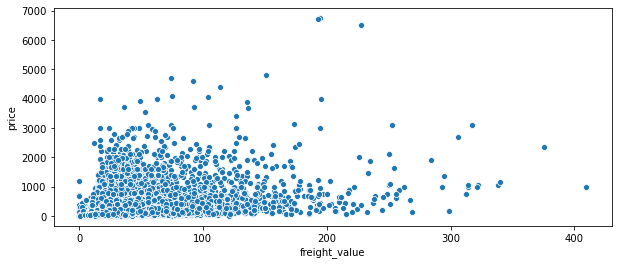

In [35]:
f, ax = plt.subplots(figsize=(10, 4))

sns.scatterplot(x="freight_value", y="price", data=df_ordem_produto);

Não existe uma correlação forte entre aumento do valor do produto x aumento do valor do frete

## Categorias dos produtos

In [36]:
df_ordem_produto['product_category_name'].value_counts()

cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
la_cuisine                          14
cds_dvds_musicais                   14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64

In [37]:
categ_mais_vendidas = df_ordem_produto['product_category_name'].value_counts().head(10)

In [38]:
categ_mais_vendidas

cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: product_category_name, dtype: int64

## Montando o gráfico com as categorias mais vendidas

In [39]:
trace = go.Pie(labels = categ_mais_vendidas.index,
               values = categ_mais_vendidas.values,
               pull=[0.1,0.1,0,0,0,0,0,0,0,0],
               direction='clockwise',
               marker = {'line' : {'color':'#000000','width':2}}
              )

# Armazenando gráfico em uma lista

data = [trace]

# Criando Layout

layout = go.Layout(title='Categorias mais vendidas no período')

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)